# Chapter 2 Homework Questions:

##### 2E1 Answer:
    This is a question about the posterior. The posterior is always written in Pr(p|data).
    This means the answer is Pr(rain|Monday), as this should be read as the chance of rain given that it is Monday.
    See page 36. 
##### 2E2 Answer:
    Similar to question one, Pr(Monday|rain) should be read as the chance of Monday given that it is raining.
    See page 36. 
##### 2E3 Answer:
    The tricky part of this question is that it actually has two correct answers
    The first is simple, we have Pr(Monday|rain)
    The second is still Pr(Monday|rain) but written out on the right-hand side.
    Pr(rain|Monday) * Pr(Monday) / Pr(rain)
    See page 36-37.
##### 2E4 Answer:
    No right answer here. This is more about the whole "small world vs large world" concept Richard is trying to get across in Chap2
    When we say "the probability of water is 0.7", what we're really saying is we don't know for certain that probability of water is 0.7, but given the data we've observed and the model we've designed based on the data story we came up with, our best guess is that probability is 0.7. If we observed new data, or come up with a different model, the 0.7 number could change

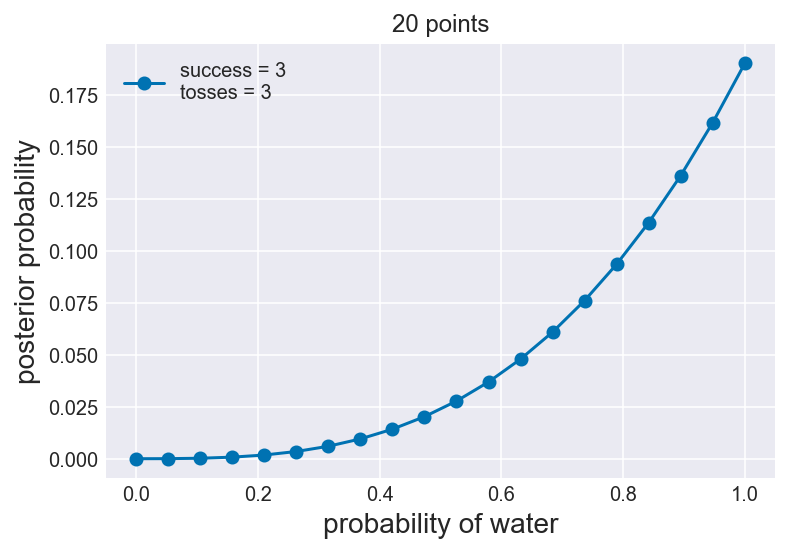

In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

# 2M1 (1):
# see page 40

def grid_approx(grid_points, success, tosses):
    '''
    Input: number of grid points, number of success, number of tosses
    Output: The grid points. And a posterior distribution based on the binomial likelyhood
    '''
    # p_grid is a list of number between 0 and 1. If the input is 20, then the list will be 20 in length
    # p_grid will be use here as an input to push through the model. 
    p_grid = np.linspace(0, 1, grid_points)
    
    # this initial prior is flat. print it and you can see it is just a list of 5s repeating
    prior = np.repeat(5, grid_points)
    
    #likelihood is the relative number of ways this specific sequence can occur, given the probability (p_grid)
    #likelihood does not sum up to one and is only meaningful if you compare them to each other
    #for example a likelihood of 0.1 is not that it'll occur 10% of the time.
    #but rather there are half as many ways 0.1 can occur when compare to 0.2
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

# these are the inputs
points = 20
w, n = 3, 3
# create chart
p_grid, posterior = grid_approx(points, w, n)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);


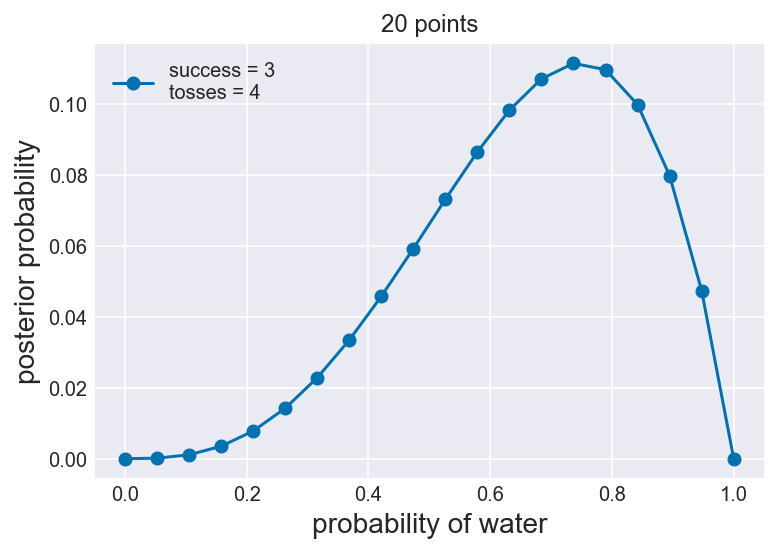

In [17]:
# 2M1 (2):
# these are the inputs
points = 20
w, n = 3, 4
# create chart
p_grid, posterior = grid_approx(points, w, n)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

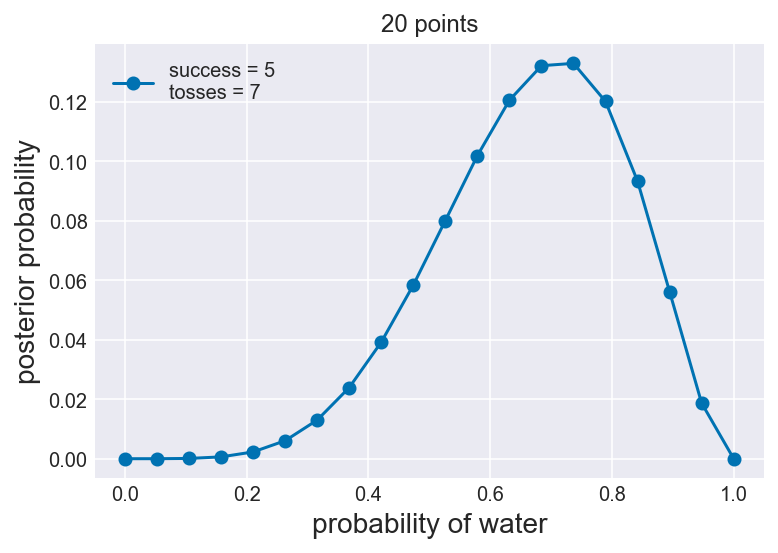

In [18]:
# 2M1 (3):
# these are the inputs
points = 20
w, n = 5, 7
# create chart
p_grid, posterior = grid_approx(points, w, n)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

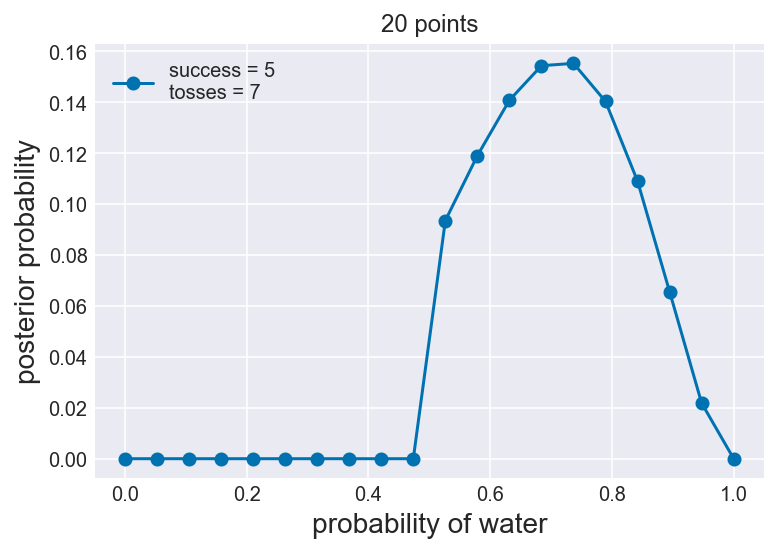

In [26]:
# 2M2:
# only the 2M1(3) is plotted, you can plot the rest by changing the w,n inputs
def grid_approx(grid_points, success, tosses):
    '''
    Input: number of grid points, number of success, number of tosses
    Output: The grid points. And a posterior distribution based on the binomial
    '''
    p_grid = np.linspace(0, 1, grid_points)
    #new Prior
    #when it is less than 0.5, we'd get 0, if it is >=0.5, we'd get 1
    #we can change the 1 to 5 or 10 or whatever, it'll be the same, as long as they're the same number
    prior = np.where(p_grid<0.5,0,1)
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

# these are the inputs
points = 20
w, n = 5, 7
# create chart
p_grid, posterior = grid_approx(points, w, n)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

#### 2M3:
page 37 see the top formula

Reasoning: Without any knowledge of land vs water, we know that the chance of getting Earth is 50/50.  
Now that question is how do we incorporate the knowledge of knowing it landed on land.  
We use bayes' theorem. Pr(earth|land) = Pr(land|earth)* Pr(earth) / Pr(land)  

Pr(land|earth)=0.3 because we know from the question earth is 0.7 water.  
Pr(earth) is 0.5, because 50/50 chance either we get mars or earth.  
Pr(land) is (30 + 100) / 200 = 0.65, 30 is percent earth land, and 100 is mars land, and 200 is the total possibility.  

plug in our known variables Pr(earth|land) = 0.3* 0.5 / 0.65, which is 0.23


In [2]:
#2M4  
# a classic probability problem
# let's do this in pandas dataframe


# create the cards
cards={
    'c1':{
        'side1':'black',
        'side2':'black',
    },
    'c2':{
        'side1':'black',
        'side2':'white',
    },
    'c3':{
        'side1':'white',
        'side2':'white',
    },
}

# transpose it for readability via .T method
df=pd.DataFrame(cards).T
df



,side1,side2
c1,black,black
c2,black,white
c3,white,white


In [56]:
# c3 is out since we have one black card so c3 is impossible
# let's remove it from the df
df.drop(['c3'],inplace=True)
df

,side1,side2
c1,black,black
c2,black,white


In [60]:
# This is where the trick is, and why this problem is in so many textbooks.
# Looking at the previous df, you might think if one side is black, then it'll be 50/50 the other side is also black
# but that's wrong.
# let's first label all the sides. And then let's count up all the sides, instead of the cards.

new_cards={
    'c1':{
        'side1':'black1',
        'side2':'black2',
    },
    'c2':{
        'side1':'black3',
        'side2':'white1',
    }
}
df_new=pd.DataFrame(new_cards).T
df_new

,side1,side2
c1,black1,black2
c2,black3,white1


In [62]:
# now, think about how many ways we'll get black side up
# looking at the final df, 'pos' short for possibilities
# pos4_c2 is impossible, because we know we have a black card up
# now we have 3 possibilities with black is up
# in 2/3 of those possibilities, we get a black card.
# So the moral of the stories is...count the possibilities, don't count the cards.

conjectures={
    'pos1_c1':{
        'up':'black1',
        'down':'black2',
    },
    'pos2_c1':{
        'up':'black2',
        'down':'black1',
    },
    'pos3_c2':{
        'up':'black3',
        'down':'white1',
    },
    'pos4_c2':{
        'up':'white1',
        'down':'black3',
    }
    
}
pos=pd.DataFrame(conjectures).T
pos

,down,up
pos1_c1,black2,black1
pos2_c1,black1,black2
pos3_c2,white1,black3
pos4_c2,black3,white1


In [3]:
#2M5
#Let's add a card
cards_2m5={
    'c1':{
        'side1':'black1',
        'side2':'black2',
    },
    'c2':{
        'side1':'black3',
        'side2':'white1',
    },
    'c4':{
        'side1':'black4',
        'side2':'black5',
    },
}
df_2m5=pd.DataFrame(cards_2m5).T
df_2m5

,side1,side2
c1,black1,black2
c2,black3,white1
c4,black4,black5


In [5]:
# Counting it up, the answer is 4 out of 5
conjectures_2m5={
    'pos1_c1':{
        'up':'black1',
        'down':'black2',
    },
    'pos2_c1':{
        'up':'black2',
        'down':'black1',
    },
    'pos3_c2':{
        'up':'black3',
        'down':'white1',
    },
    'pos4_c2':{
        'up':'white1',
        'down':'black3',
    }
    ,
    'pos5_c4':{
        'up':'black4',
        'down':'black5',
    }
    ,
    'pos6_c4':{
        'up':'black5',
        'down':'black4',
    }
    
}
pos_2m5=pd.DataFrame(conjectures_2m5).T
pos_2m5

,down,up
pos1_c1,black2,black1
pos2_c1,black1,black2
pos3_c2,white1,black3
pos4_c2,black3,white1
pos5_c4,black5,black4
pos6_c4,black4,black5


In [45]:
#2M6
#This question is about incorporating priors
#See page 27
#Since the card is the same, we know there are still 2 ways we can see 2 black sides.
#But now the question is how many total ways are there?

#From the df at the bottom, you can see now there are 4 ways to produce 1 black side up.
#So we take 2 ways we can get 2 black sides, divide by 4 total ways. 2/4=0.5

cards_2m6={
    'c1':{
        'side1':'black',
        'side2':'black',
        'ways_to_produce_1_black_card':2,
        'prior_info':1,
    },
    'c2':{
        'side1':'black',
        'side2':'white',
        'ways_to_produce_1_black_card':1,
        'prior_info':2,
    },
    'c3':{
        'side1':'white',
        'side2':'white',
        'ways_to_produce_1_black_card':0,
        'prior_info':3,
    },
    }
# order the columns
columns=['side1', 'side2','ways_to_produce_1_black_card','prior_info']
df_2m6=pd.DataFrame(cards_2m6).T[columns]

df_2m6['new_ways_to_produce_1_black_card']=df_2m6['ways_to_produce_1_black_card']*df_2m6['prior_info']
df_2m6

,side1,side2,ways_to_produce_1_black_card,prior_info,new_ways_to_produce_1_black_card
c1,black,black,2,1,2
c2,black,white,1,2,2
c3,white,white,0,3,0


In [54]:
# 2M7
# I did this the dumb way, which is just listing every possibility I can think of
# Start with card 1 and list all the way it can produce 1 black and 1 white up
# Move to card 2, and so on
new_cards={
    'c1':{
        'side1':'black1',
        'side2':'black2',
    },
    'c2':{
        'side1':'black3',
        'side2':'white1',
    },
    'c3':{
        'side1':'white2',
        'side2':'white3',
    }
}
df_new=pd.DataFrame(new_cards).T
df_new

,side1,side2
c1,black1,black2
c2,black3,white1
c3,white2,white3


In [55]:
conjectures={
    'pos1_c1':{
        'up1':'black1',
        'down':'black2',
        'up2':'white1',
    },
    'pos2_c1':{
        'up1':'black1',
        'down':'black2',
        'up2':'white2',
    },
    'pos3_c1':{
        'up1':'black1',
        'down':'black2',
        'up2':'white3',
    },
    'pos4_c1':{
        'up1':'black2',
        'down':'black1',
        'up2':'white1',
    },
    'pos5_c1':{
        'up1':'black2',
        'down':'black1',
        'up2':'white2',
    },
    'pos6_c1':{
        'up1':'black2',
        'down':'black1',
        'up2':'white3',
    },
    'pos7_c2':{
        'up1':'black3',
        'down':'white1',
        'up2':'white2',
    },
    'pos8_c2':{
        'up1':'black3',
        'down':'white1',
        'up2':'white3',
    },
    
}
pos=pd.DataFrame(conjectures).T
pos
# count the down column! 6/8=0.75

,down,up1,up2
pos1_c1,black2,black1,white1
pos2_c1,black2,black1,white2
pos3_c1,black2,black1,white3
pos4_c1,black1,black2,white1
pos5_c1,black1,black2,white2
pos6_c1,black1,black2,white3
pos7_c2,white1,black3,white2
pos8_c2,white1,black3,white3


In [11]:
# 2H1:
# It might help to think first, what is the chance of getting 1 twin.
# Here is the chance of getting 1 twin
# Pr(twins) = Pr(twins|a) * Pr(Specie A) + Pr(twins|b) * Pr(Specie B)
pr_twin=0.1 * 0.5 + 0.2 * 0.5
print('pr_twin is {0:.4f}'.format(pr_twin))
# This should be pretty straight forward

# Here is the tricky part, what does knowing the first birth is twins change in the 1 twin formula?
# Pr(twins) = Pr(twins|a) * Pr(Specie A) + Pr(twins|b) * Pr(Specie B)
# Does it change the Pr(twins|a)? No it does not. 
# One panda is not going to change the behavior of the specie.
# Observing 1 twin does change Pr(Specie A) and Pr(Specie B). 
# Intuitively, if we got one twin, it'll be more likely the pandas is from specie B instead of specie A.
# So we need to solve for Pr(Specie A | twin) and Pr(Specie B | twin)

# Pr(Specie A | twin) = Pr(twin|Specie A) * Pr(Specie A) / Pr(twin)
specie_a_given_twin = 0.1 * 0.5 /  pr_twin
print('specie_a_given_twin is {0:.4f}'.format(specie_a_given_twin))

# Pr(Specie B | twin) = Pr(twin|Specie A) * Pr(Specie A) / Pr(twin)
specie_b_given_twin = 0.2 * 0.5 /  pr_twin
print('specie_b_given_twin is {0:.4f}'.format(specie_b_given_twin))

# Now we can write our updated formula. I put the original on top to make the change more apparent
# Pr(twins)        = Pr(twins|a) * Pr(Specie A)        + Pr(twins|b) * Pr(Specie b)
# Pr(double twins) = Pr(twins|a) * Pr(Specie A | twin) + Pr(twins|b) * Pr(Specie B | twin)

pr_double_twins = 0.1 * specie_a_given_twin + 0.2 * specie_b_given_twin
print('probability of double twins is {0:.4f}'.format(pr_double_twins))

pr_twin is 0.1500
specie_a_given_twin is 0.3333
specie_b_given_twin is 0.6667
probability of double twins is 0.1667


In [33]:
# 2H2:
# we solved this problem already in 2H1
specie_a_given_twin = 0.1 * 0.5 /  pr_twin
print('specie_a_given_twin is {0:.4f}'.format(specie_a_given_twin))

specie_a_given_twin is 0.3333


In [35]:
# 2H3
# This is about bayesian updating. recall in page 25 where Richard discuss why we multiple prior with new info
# So we need to update specie_a_given_twin in question 3, with the new info that we got a singleton birth

# Formula:
# Pr(specie A | twin,singleton)=Pr(twin,singleton| specie A) * Pr(specie A) / Pr(twin,singleton)

# let's do the denominator first. 
# Pr(twin,singleton) = Pr(twin,singleton |a) * Pr(a) + Pr(twin,singleton |b) * Pr(b)
# We know that Pr(twin,singleton |a) is = chance of a getting twin * chance of a getting singleton
# We know that Pr(twin,singleton |b) is = chance of b getting twin * chance of b getting singleton
# To combine them together we do this:
# Because a panda is either specie A or Specie b, they're mutually exclusive, so we + them
pr_twin_singleton=0.1*0.9*0.5+0.2*0.8*0.5

# now let's do the likelyhood
# Pr(twin,singleton| specie A) = chance of a getting twin * chance of a getting singleton
pr_twin_singleton_a = 0.1*0.9

# Finally, the prior
# Pr(specie A) is still 0.5
pr_a=0.5

# Putting it all together
# Pr(specie A | twin,singleton)=Pr(twin,singleton| specie A) * Pr(specie A) / Pr(twin,singleton)
pr_a_twin_single = pr_twin_singleton_a *pr_a / pr_twin_singleton
 
print('specia A who already had a twin and then a singleton is {0:.2f}'.format(pr_a_twin_single))

specia A who already had a twin and then a singleton is 0.36


In [2]:
# 2H4

# Here is the formula:
# Find Pr(Specie A | test_shows_a) = Pr(test_shows_a | Specie A) * Pr(A) / Pr(test_shows_a)

# Let's again start with the denominator, since it is the most challenging part IMO
# Pr(Test Shows A) = Pr(TestShowsA| A) * Pr(A) + Pr(TestShowsA|B) * Pr(B)
# similar to 2H3, the way we find denominator is by adding, since pandas species are mutually exclusive
# But now how do we find Pr(TestShowsA|B)?
# Let's rewrite everything in terms of test and species.
# We're really interested in knowing what does (1-0.8) and (1-0.65) means.
# (Test = A, Specie = A) = 0.8
# (Test = B, Specie = A) = 0.2
# (Test = B, Specie = B) = 0.65
# (Test = A, Specie = B) = 0.35
# Now we want to know how many ways Test = A can show up.
# Pr(Test Shows A) = Pr(TestShowsA| A) * Pr(A) + Pr(TestShowsA|B) * Pr(B)
test_shows_a =  0.8 * 0.5 + 0.35 *0.5

# Next we do the likelyhood. Pr(test_shows_a | Specie A)
# (Test = A, Specie = A) = 0.8
pr_test_a_a=0.8

# finally prior
# Pr(A) = 0.5
pr_a=0.5

# Pr(Specie A | test_shows_a) = Pr(test_shows_a | Specie A) * Pr(A) / Pr(test_shows_a)
pr_a_testShowsA = pr_test_a_a * pr_a  / test_shows_a
print('probability of specie a given the test shows a is {0:.3f}'.format(pr_a_testShowsA))

probability of specie a given the test shows a is 0.696


In [3]:
# Some solutions online has the following solution. https://rpubs.com/Khaltar/326789
# Where they defined the Pr(Test Shows A) as 0.8 * 0.5 + 0.65 *0.5
# This is wrong. 0.8 * 0.5 + 0.65 *0.5 = Pr(Test is right), and not Pr(Test Shows A)
# So pushing that through the bayes' theorem we'd find Pr(Specie A | test_is_right)
# Intuitively, the set up is the researcher did the test, but she did not tell us A or B, she just said the test is right
# Now given the test is right, what is the chance that we got Specie A.
# It is slightly more than 50/50 because one test is more often right than the next

# formula
# Pr(Specie A | test_is_right) = Pr(test_is_right | Specie A) * Pr(A) / Pr(test_shows_a)

# denominator = Pr(test_is_right) = Pr(test_is_right| A) * Pr(A) + Pr(test_is_right|B) * Pr(B)
test_is_right   =  0.8 * 0.5 + 0.65 *0.5
# likelyhood. Pr(test is right | Specie A) = (Test = A, Specie = A) =  0.8
pr_right_a = 0.8
# prior = 0.5
pr_a=0.5

pr_a_testRight = pr_right_a * pr_a / test_is_right
print('probability of specie a given the test is right is {0:.3f}'.format(pr_a_testRight))

probability of specie a given the test is right is 0.552


In [10]:
# 2H4 for 2h3
# Let's do 2h3 again but now incorporating 2h4 test results

# Question: given the pandas had a twin, and then a singleton, and the test shows a, what is the chance she is specie a
# Pr(specie A | twin,singleton,test_a)=Pr(twin,singleton,test_a| specie A) * Pr(specie A) / Pr( twin,singleton,test_a)

# Let's start with the denominator
# Pr(twin,singleton,test_a)= Pr(twin,singleton,test_a |a) * Pr(a) + Pr(twin,singleton,test_a |b) * Pr(b)
# Let's recall (2h3) Pr(twin,singleton |a) is = chance of a getting twin * chance of a getting singleton 
# for a, Pr(twin,singleton,test_a |a) = chance of a getting twin * chance of a getting singleton * test=a,specie=a
# for b, Pr(twin,singleton,test_a |b) = chance of b getting twin * chance of b getting singleton * test=a,specie=b
# Pr(twin,singleton,test_a |a) = 0.1*0.9*0.8 (see why 0.8 in 2h4)
# Pr(twin,singleton,test_a |b) = 0.2*0.8*0.35 (see why 0.35 in 2h4)
# Now let's combine them
# Pr(twin,singleton,test_a)= Pr(twin,singleton,test_a |a) * Pr(a) + Pr(twin,singleton,test_a |b) * Pr(b)
pr_twin_singleton_test_a = 0.1*0.9*0.8*0.5 + 0.2*0.8*0.35*0.5

# likelihood Pr(twin,singleton,test_a| specie A)
pr_twin_singleton_test_a_a=0.1*0.9*0.8

# prior specie a
pr_a=0.5

pr_a_twin_singleton_test_a=pr_twin_singleton_test_a_a * pr_a / pr_twin_singleton_test_a
print('probability of specie a given the twin, singleton and test_a is {0:.3f}'.format(pr_a_twin_singleton_test_a))

probability of specie a given the twin, singleton and test_a is 0.562
